In [3]:
import numpy as np
import pandas as pd
import json
import joblib
import matplotlib.pyplot as plt

In [1]:
clf = joblib.load('SA_lr.pkl')

In [2]:
from tqdm import tqdm_notebook

In [3]:
from konlpy.tag import Okt
okt = Okt()

In [4]:
def okt_tokenizer(text):
    # 형태소 단위로 토큰화 작업
    tokens = okt.morphs(text)
    return tokens
tfidf = joblib.load('tfidf.pkl')

In [5]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
txts = []
with open('../YouTubeResult.txt','r',encoding='UTF8') as f:
    string = f.readlines()
    for li in string:
        try:
            texts = json.loads(li)['text']
            txts.append(texts)
        except:
            pass

In [59]:
txts_a = []
with open('../YouTubeResult.txt','r',encoding='UTF8') as f:
    string = f.readlines()
    for li in string[:4]:
        try:
            texts = json.loads(li)
            txts_a.append(texts)
        except:
            pass

In [62]:
txts_a

[{'cid': 'Ugj8Wbg8cfUmRngCoAEC',
  'text': '참고로 일리오스 우물에 들어가면 무서운 소리남',
  'time': '4년 전(수정됨)',
  'author': '조회수999,999,999',
  'channel': 'UCUYXsxQause81HqEWnkwpIA',
  'votes': '0',
  'photo': 'https://yt3.ggpht.com/ytc/AAUvwnigqlOBgcHU-XhsFeGnjCAHPsi907F3lF88x_Y6=s176-c-k-c0x00ffffff-no-rj',
  'heart': False},
 {'cid': 'Ugi8UR-vZy6HLHgCoAEC',
  'text': '5:22에 등대 불빛도 돌아가네...세심한 갓리자드',
  'time': '4년 전',
  'author': '햅피니스123',
  'channel': 'UCLGBv90eD7SXbpNmfKwwIgw',
  'votes': '4',
  'photo': 'https://yt3.ggpht.com/ytc/AAUvwnhHwXfrY8_wOp5fKaKFy3x2RooKfneGx9yDHdlfUg=s176-c-k-c0x00ffffff-no-rj',
  'heart': False},
 {'cid': 'UghUfC-jjwDSY3gCoAEC',
  'text': '뀽',
  'time': '4년 전',
  'author': '최윤',
  'channel': 'UCi4tQkcReDhZeHKFu9jGTWQ',
  'votes': '0',
  'photo': 'https://yt3.ggpht.com/ytc/AAUvwnh3JnOVwVebk_RPTppw6EIyJxC0oYv-Xv6ZFBGnfg=s176-c-k-c0x00ffffff-no-rj',
  'heart': False},
 {'cid': 'UghSUPnN7G5LUngCoAEC',
  'text': '옥구슬만 몰라씀\n \n \n \n \n \n 그리고 지브롤터 솜브라로 ㄷ...... 아님다 ㅋ',
  'time

In [6]:
len(txts)

1358094

In [13]:
points_decision_power = []
for sentence in tqdm_notebook(txts):
    st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(sentence)
    st = [" ".join(st)]
    st_tfidf = tfidf.transform(st)
    point = clf.decision_function(st_tfidf)
    points_decision_power.append(point)

<ipython-input-13-51c9e9746cea>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(txts):


In [16]:
len(points_decision_power)

1358094

In [21]:
np.array(points_decision_power)

array([[-1.52337814],
       [-0.47547522],
       [-0.75446598],
       ...,
       [-0.9267617 ],
       [-1.59583513],
       [-0.93470822]])

In [23]:
np.array(points).reshape(-1,2)

array([[0.82103539, 0.17896461],
       [0.61667885, 0.38332115],
       [0.68015103, 0.31984897],
       ...,
       [0.71641784, 0.28358216],
       [0.83143548, 0.16856452],
       [0.71802951, 0.28197049]])

In [24]:
txt_df = pd.DataFrame()
txt_df['comment'] = txts
txt_df['decision_power'] = np.array(points_decision_power)
txt_df['positive_proba'] = np.array(points).reshape(-1,2)[:,1]
txt_df['negative_proba'] = np.array(points).reshape(-1,2)[:,0]

In [26]:
txt_df['pos/neg'] = txt_df['decision_power'].map(lambda x:1 if x>=0 else 0)
txt_df.head(10)

,comment,decision_power,positive_proba,negative_proba,pos/neg
0,참고로 일리오스 우물에 들어가면 무서운 소리남,-1.523378,0.178965,0.821035,0
1,5:22에 등대 불빛도 돌아가네...세심한 갓리자드,-0.475475,0.383321,0.616679,0
2,뀽,-0.754466,0.319849,0.680151,0
3,옥구슬만 몰라씀\n \n \n \n \n \n 그리고 지브롤터 솜브라로 ㄷ........,-1.404263,0.197140,0.802860,0
4,이형말투 ㅋㅋㅋ,3.572677,0.972686,0.027314,1
5,우왁굳님 저가 아는거 엄청많이나와욤ㅋㅋ,1.196650,0.767928,0.232072,1
6,나만네팔이 느그팔로 들음?,-0.574508,0.360197,0.639803,0
7,하나무라 그림 봄,-1.136011,0.243054,0.756946,0
8,맵을 만드는법좀 알려주세요 무한 스킬도 쓰고싶어요 ㅠㅠ,-0.708675,0.329892,0.670108,0
9,우헤헤헤헤 요소 나다 요소!! 이히힣ㅎ 나를 찾아버려(ㅈㅅ 넘 외롭습니다 요즘,-0.125524,0.468660,0.531340,0


In [27]:
txt_df['pos/neg'].value_counts()

0    752863
1    605231
Name: pos/neg, dtype: int64

In [121]:
np.sum(txt_df['decision_power'])/1358094

0.2758061081818793

In [30]:
import matplotlib.pyplot as plt

# 그래프 아이디어가 떠오른다면 여기서부터

In [88]:
txt_df = pd.read_csv('result0623.csv')

In [89]:
txt_df.shape

(1358094, 5)

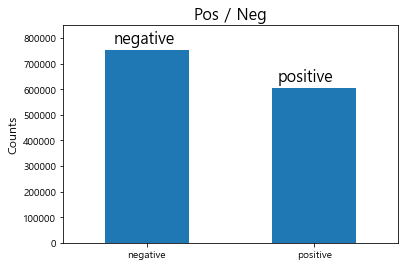

In [101]:
txt_df['pos/neg'].value_counts().plot(kind='bar')
plt.text(0.78,630000,'positive',fontdict={'fontsize':16})
plt.text(-0.2,780000,'negative',fontdict={'fontsize':16})
plt.ylim([0,850000])
plt.xticks(ticks = [0,1],labels=['negative','positive'],rotation='0')
plt.title('Pos / Neg',fontdict={'fontsize':16})
plt.ylabel('Counts',fontdict={'fontsize':12})
plt.savefig('entire_count.png',bbox_inches='tight', dpi=300)

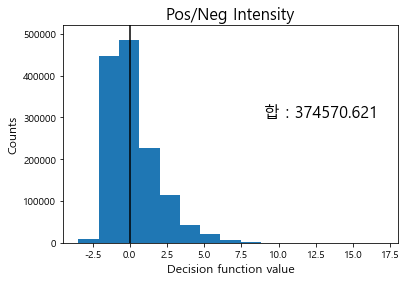

In [120]:
plt.hist(txt_df['decision_power'],bins=15)
plt.vlines(0,0,520000,color='black')
plt.ylim([0,520000])
plt.title('Pos/Neg Intensity',fontdict={'fontsize':16})
plt.xlabel('Decision function value',fontdict={'fontsize':12})
plt.ylabel('Counts',fontdict={'fontsize':12})
plt.text(9,300000,'합 : '+str(np.round(np.sum(txt_df['decision_power']),3)),fontdict={'fontsize':16})
plt.savefig('entire_intensity.png',bbox_inches='tight', dpi=300)

In [43]:
#txt_df.to_csv('result0623.csv',index=False)

In [6]:
def emotion_predict(sentence):
    st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(sentence)
    st = [" ".join(st)]
    st_tfidf = tfidf.transform(st)
    st_predict = clf.predict(st_tfidf)
    decision_power = clf.decision_function(st_tfidf)
    return decision_power[0]

In [7]:
information = {'text':[],'author':[],'decision_power':[],'time':[],'votes':[]}
with open('../YouTubeResult.txt','r',encoding='UTF8') as f:
    string = f.readlines()
    for li in tqdm_notebook(string):
        try:
            text = json.loads(li)['text']
            decision_power = emotion_predict(text)
            written_time = json.loads(li)['time']
            vote = json.loads(li)['votes']
            author = json.loads(li)['author']
            information['text'].append(text)
            information['decision_power'].append(decision_power)
            information['time'].append(written_time)
            information['votes'].append(vote)
            information['author'].append(author)
        except:
            pass


<ipython-input-7-6feb106801f0>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for li in tqdm_notebook(string):


In [8]:
information_df = pd.DataFrame(information)

In [12]:
information_df.head()

,text,author,decision_power,time,votes
0,참고로 일리오스 우물에 들어가면 무서운 소리남,"조회수999,999,999",-1.523378,4년 전(수정됨),0
1,5:22에 등대 불빛도 돌아가네...세심한 갓리자드,햅피니스123,-0.475475,4년 전,4
2,뀽,최윤,-0.754466,4년 전,0
3,옥구슬만 몰라씀\n \n \n \n \n \n 그리고 지브롤터 솜브라로 ㄷ........,발바닥무시무시한,-1.404263,4년 전(수정됨),0
4,이형말투 ㅋㅋㅋ,JINN n,3.572677,3년 전,0


In [13]:
information_df.to_csv("text_time_vote.csv",index=False)

In [ ]:
information_df = pd.read_csv('text_time_vote.csv')

In [112]:
information_df[['text','author','time','votes']]

,text,author,time,votes
0,참고로 일리오스 우물에 들어가면 무서운 소리남,"조회수999,999,999",4년 전(수정됨),0
1,5:22에 등대 불빛도 돌아가네...세심한 갓리자드,햅피니스123,4년 전,4
2,뀽,최윤,4년 전,0
3,옥구슬만 몰라씀\n \n \n \n \n \n 그리고 지브롤터 솜브라로 ㄷ........,발바닥무시무시한,4년 전(수정됨),0
4,이형말투 ㅋㅋㅋ,JINN n,3년 전,0
...,...,...,...,...
1358089,한코코의 장난감 상자 그만해 이 팬티야,스탠다드,3년 전,0
1358090,휴뮤 내꺼도 있는 말인데\n왜 그렇게 불편해해,예!?,3년 전,0
1358091,휴뮤 내꺼,예!?,3년 전,0
1358092,니 거?,안쌱,3년 전,0


In [52]:
np.unique(information_df['time'])

array(['10개월 전', '10개월 전(수정됨)', '10시간 전', '10시간 전(수정됨)', '11개월 전',
       '11개월 전(수정됨)', '11시간 전', '12시간 전', '12시간 전(수정됨)', '13분 전',
       '13시간 전', '13시간 전(수정됨)', '14시간 전', '14시간 전(수정됨)', '15분 전',
       '15시간 전', '16시간 전', '17분 전', '17시간 전', '17시간 전(수정됨)', '18분 전',
       '18시간 전', '18시간 전(수정됨)', '19분 전', '19시간 전', '19시간 전(수정됨)', '1개월 전',
       '1개월 전(수정됨)', '1년 전', '1년 전(수정됨)', '1분 전', '1시간 전', '1시간 전(수정됨)',
       '1일 전', '1일 전(수정됨)', '1주 전', '1주 전(수정됨)', '20분 전', '20시간 전',
       '20시간 전(수정됨)', '21시간 전', '21시간 전(수정됨)', '22시간 전', '22시간 전(수정됨)',
       '23분 전', '23시간 전', '23시간 전(수정됨)', '24분 전', '26분 전', '27분 전',
       '28분 전', '29분 전', '2개월 전', '2개월 전(수정됨)', '2년 전', '2년 전(수정됨)',
       '2시간 전', '2시간 전(수정됨)', '2일 전', '2일 전(수정됨)', '2주 전', '2주 전(수정됨)',
       '30분 전', '32분 전', '34분 전', '35초 전', '36분 전', '37분 전', '38분 전',
       '39분 전', '3개월 전', '3개월 전(수정됨)', '3년 전', '3년 전(수정됨)', '3분 전',
       '3분 전(수정됨)', '3시간 전', '3시간 전(수정됨)', '3일 전', '3일 전(수정됨)', '3주 전',
       '3주 전(수정됨)', '40분

In [93]:
np.unique(information_df['votes'].astype('str').map(lambda x:np.nan if x=='0' else x).dropna())

array(['1', '1.1만', '1.1천', ..., '997', '998', '999'], dtype=object)

In [53]:
def transform_to_integer(x):
    if x[-1]=='만':
        numeric_part = float(x[:-1])
        return numeric_part*10000
    elif x[-1]=='천':
        numeric_part = float(x[:-1])
        return numeric_part*1000
    else:
        return float(x)
information_df['votes'] = information_df['votes'].map(transform_to_integer)

In [ ]:
def eliminate_useless(x):
    if x[-5:]=='(수정됨)':
        return x[:-5]
    else:
        return x

In [54]:
information_df['time'] = information_df['time'].map(eliminate_useless)

In [55]:
np.unique(information_df['time'])

array(['10개월 전', '10시간 전', '11개월 전', '11시간 전', '12시간 전', '13분 전',
       '13시간 전', '14시간 전', '15분 전', '15시간 전', '16시간 전', '17분 전', '17시간 전',
       '18분 전', '18시간 전', '19분 전', '19시간 전', '1개월 전', '1년 전', '1분 전',
       '1시간 전', '1일 전', '1주 전', '20분 전', '20시간 전', '21시간 전', '22시간 전',
       '23분 전', '23시간 전', '24분 전', '26분 전', '27분 전', '28분 전', '29분 전',
       '2개월 전', '2년 전', '2시간 전', '2일 전', '2주 전', '30분 전', '32분 전',
       '34분 전', '35초 전', '36분 전', '37분 전', '38분 전', '39분 전', '3개월 전',
       '3년 전', '3분 전', '3시간 전', '3일 전', '3주 전', '40분 전', '41분 전', '43분 전',
       '44분 전', '45분 전', '46분 전', '47분 전', '48분 전', '49분 전', '4개월 전',
       '4년 전', '4분 전', '4시간 전', '4일 전', '4주 전', '50분 전', '51분 전', '52분 전',
       '53분 전', '54분 전', '54초 전', '55분 전', '58분 전', '5개월 전', '5년 전',
       '5시간 전', '5일 전', '6개월 전', '6년 전', '6시간 전', '6일 전', '7개월 전', '7분 전',
       '7시간 전', '8개월 전', '8시간 전', '9개월 전', '9시간 전'], dtype=object)

In [ ]:
# votes는 천이라는 글자가 있으니 고려해서 groupby

In [147]:
# 큰 시간단위로 뭉친 것들이 당연히 수가 클테니 평균을 내준다.
time_counts = information_df.groupby(information_df['time']).agg({'time':'count','votes':'mean','decision_power':'mean'})
time_counts

,time,votes,decision_power
time,,,
10개월 전,35622,10.595643,0.239530
10시간 전,27,0.111111,-0.439692
11개월 전,53922,11.014020,0.203642
11시간 전,15,0.066667,0.079996
12시간 전,22,0.045455,-0.023852
...,...,...,...
7시간 전,34,0.264706,-0.102329
8개월 전,51109,12.520045,0.337436
8시간 전,16,0.187500,-0.509601


In [148]:
# 시간 순으로 정렬
# 숫자 뒤의 시간은 다음과 같다
def temp_transform(x):
    time_unit = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(x)
    return time_unit[0]+' '+time_unit[1]

time_units = pd.Series(np.unique(information_df['time'])).map(temp_transform)
time_units

0     개월 전
1     시간 전
2     개월 전
3     시간 전
4     시간 전
      ... 
86    시간 전
87    개월 전
88    시간 전
89    개월 전
90    시간 전
Length: 91, dtype: object

In [149]:
np.unique(time_units)

array(['개월 전', '년 전', '분 전', '시간 전', '일 전', '주 전', '초 전'], dtype=object)

In [150]:
# 정렬을 위한 dictionary 생성
standard = {'초 전':1,'분 전':2,'시간 전':3,'일 전':4,'주 전':5,'개월 전':6,'년 전':7}
pd.Series(time_counts.index)

0     10개월 전
1     10시간 전
2     11개월 전
3     11시간 전
4     12시간 전
       ...  
86     7시간 전
87     8개월 전
88     8시간 전
89     9개월 전
90     9시간 전
Name: time, Length: 91, dtype: object

In [151]:
def int_slicing(x):
    string_double_digit = pd.Series(list(range(10,100))).astype('str').values.tolist()
    if x[0:2] in string_double_digit:
        slicing_num = 2
    else:
        slicing_num = 1
    int_part = x[0:slicing_num]
    string_part = x[slicing_num:]
    return int_part

def string_slicing(x):
    string_double_digit = pd.Series(list(range(10,100))).astype('str').values.tolist()
    if x[0:2] in string_double_digit:
        slicing_num = 2
    else:
        slicing_num = 1
    int_part = x[0:slicing_num]
    string_part = x[slicing_num:]
    return string_part
            
time_counts['standard1'] = pd.Series(time_counts.index, index=time_counts.index).map(int_slicing).astype('int')
time_counts['standard2'] = pd.Series(time_counts.index, index=time_counts.index).map(string_slicing).map(standard).astype('int')
time_counts

,time,votes,decision_power,standard1,standard2
time,,,,,
10개월 전,35622,10.595643,0.239530,10,6
10시간 전,27,0.111111,-0.439692,10,3
11개월 전,53922,11.014020,0.203642,11,6
11시간 전,15,0.066667,0.079996,11,3
12시간 전,22,0.045455,-0.023852,12,3
...,...,...,...,...,...
7시간 전,34,0.264706,-0.102329,7,3
8개월 전,51109,12.520045,0.337436,8,6
8시간 전,16,0.187500,-0.509601,8,3


In [152]:
time_counts = time_counts.sort_values(by=['standard2','standard1'])
time_counts.drop(['standard1','standard2'],axis=1,inplace = True)
time_counts.columns = ['counts','votes','decision_power']

In [155]:
time_counts.to_csv("all_time_mean.csv")

## 이어서

In [26]:
df = pd.read_csv('all_time_mean.csv')

In [36]:
df

,time,counts,votes,decision_power
0,35초 전,1,0.000000,-0.888944
1,54초 전,1,0.000000,1.581522
2,1분 전,1,0.000000,1.046314
3,3분 전,2,0.000000,1.945449
4,4분 전,1,1.000000,2.146505
...,...,...,...,...
86,2년 전,183674,12.945164,0.456557
87,3년 전,151021,8.892008,0.271057
88,4년 전,149010,5.898611,0.098069
89,5년 전,24949,1.449036,0.395215


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc, rcParams
import platform
if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')
rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

xlabel -> (초, 분, 시간은 통합) 일, 월, 년은 vline을 그어서 구분

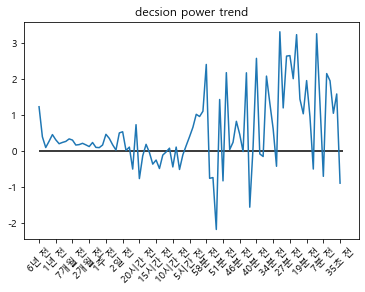

In [159]:
fig,ax = plt.subplots()
ax.plot(df['time'][::-1],df['decision_power'][::-1])
xlabels = df['time'][::-5].values
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_title('decsion power trend')
ax.hlines(0,0,len(df['time']),color='black')

Text(0.5, 1.0, 'number of comments')

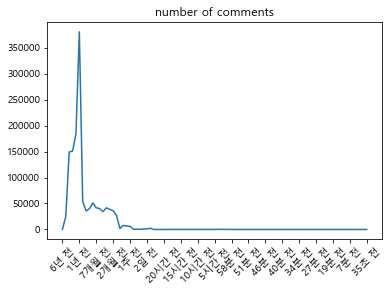

In [160]:
fig,ax = plt.subplots()
ax.plot(df['time'][::-1],df['counts'][::-1])
xlabels = df['time'][::-5].values
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_title('number of comments')

In [161]:
df['time'].values

array(['35초 전', '54초 전', '1분 전', '3분 전', '4분 전', '7분 전', '13분 전', '15분 전',
       '17분 전', '18분 전', '19분 전', '20분 전', '23분 전', '24분 전', '26분 전',
       '27분 전', '28분 전', '29분 전', '30분 전', '32분 전', '34분 전', '36분 전',
       '37분 전', '38분 전', '39분 전', '40분 전', '41분 전', '43분 전', '44분 전',
       '45분 전', '46분 전', '47분 전', '48분 전', '49분 전', '50분 전', '51분 전',
       '52분 전', '53분 전', '54분 전', '55분 전', '58분 전', '1시간 전', '2시간 전',
       '3시간 전', '4시간 전', '5시간 전', '6시간 전', '7시간 전', '8시간 전', '9시간 전',
       '10시간 전', '11시간 전', '12시간 전', '13시간 전', '14시간 전', '15시간 전',
       '16시간 전', '17시간 전', '18시간 전', '19시간 전', '20시간 전', '21시간 전',
       '22시간 전', '23시간 전', '1일 전', '2일 전', '3일 전', '4일 전', '5일 전', '6일 전',
       '1주 전', '2주 전', '3주 전', '4주 전', '1개월 전', '2개월 전', '3개월 전', '4개월 전',
       '5개월 전', '6개월 전', '7개월 전', '8개월 전', '9개월 전', '10개월 전', '11개월 전',
       '1년 전', '2년 전', '3년 전', '4년 전', '5년 전', '6년 전'], dtype=object)

In [56]:
## 그냥 mean하면 의미가 손상되므로 information_df에서부터 다시 처리, 이름 대치(~시간 전 -> 0일 전)

def transform_to_0month(string):
    short_time = ['초 전','분 전','시간 전','일 전','주 전']
    for short in short_time:
        if string.find(short) >0 :
            result =  '0개월 전'
            break
        else:
            result = string
    return result
        
information_df['time'] = information_df['time'].map(transform_to_0month)

In [57]:
information_df 

,text,author,decision_power,time,votes
0,참고로 일리오스 우물에 들어가면 무서운 소리남,"조회수999,999,999",-1.523378,4년 전,0.0
1,5:22에 등대 불빛도 돌아가네...세심한 갓리자드,햅피니스123,-0.475475,4년 전,4.0
2,뀽,최윤,-0.754466,4년 전,0.0
3,옥구슬만 몰라씀\n \n \n \n \n \n 그리고 지브롤터 솜브라로 ㄷ........,발바닥무시무시한,-1.404263,4년 전,0.0
4,이형말투 ㅋㅋㅋ,JINN n,3.572677,3년 전,0.0
...,...,...,...,...,...
1358089,한코코의 장난감 상자 그만해 이 팬티야,스탠다드,-0.818626,3년 전,0.0
1358090,휴뮤 내꺼도 있는 말인데\n왜 그렇게 불편해해,예!?,-1.265242,3년 전,0.0
1358091,휴뮤 내꺼,예!?,-0.926762,3년 전,0.0
1358092,니 거?,안쌱,-1.595835,3년 전,0.0


In [40]:
information_df = pd.read_csv("text_time_vote.csv")
information_df

,text,author,decision_power,time,votes
0,참고로 일리오스 우물에 들어가면 무서운 소리남,"조회수999,999,999",-1.523378,4년 전(수정됨),0
1,5:22에 등대 불빛도 돌아가네...세심한 갓리자드,햅피니스123,-0.475475,4년 전,4
2,뀽,최윤,-0.754466,4년 전,0
3,옥구슬만 몰라씀\n \n \n \n \n \n 그리고 지브롤터 솜브라로 ㄷ........,발바닥무시무시한,-1.404263,4년 전(수정됨),0
4,이형말투 ㅋㅋㅋ,JINN n,3.572677,3년 전,0
...,...,...,...,...,...
1358089,한코코의 장난감 상자 그만해 이 팬티야,스탠다드,-0.818626,3년 전,0
1358090,휴뮤 내꺼도 있는 말인데\n왜 그렇게 불편해해,예!?,-1.265242,3년 전,0
1358091,휴뮤 내꺼,예!?,-0.926762,3년 전,0
1358092,니 거?,안쌱,-1.595835,3년 전,0


In [58]:
np.unique(information_df['time'])

array(['0개월 전', '10개월 전', '11개월 전', '1개월 전', '1년 전', '2개월 전', '2년 전',
       '3개월 전', '3년 전', '4개월 전', '4년 전', '5개월 전', '5년 전', '6개월 전', '6년 전',
       '7개월 전', '8개월 전', '9개월 전'], dtype=object)

In [62]:
time_counts = information_df.groupby(information_df['time']).agg({'time':'count','votes':'mean','decision_power':'mean'})
time_counts.head()

,time,votes,decision_power
time,,,
0개월 전,28920,8.336342,0.237832
10개월 전,35622,10.595643,0.239530
11개월 전,53922,11.014020,0.203642
1개월 전,26994,8.763948,0.237421
1년 전,380542,12.355885,0.312399


In [63]:
def int_slicing(x):
    string_double_digit = pd.Series(list(range(10,100))).astype('str').values.tolist()
    if x[0:2] in string_double_digit:
        slicing_num = 2
    else:
        slicing_num = 1
    int_part = x[0:slicing_num]
    string_part = x[slicing_num:]
    return int_part

def string_slicing(x):
    string_double_digit = pd.Series(list(range(10,100))).astype('str').values.tolist()
    if x[0:2] in string_double_digit:
        slicing_num = 2
    else:
        slicing_num = 1
    int_part = x[0:slicing_num]
    string_part = x[slicing_num:]
    return string_part

standard = {'초 전':1,'분 전':2,'시간 전':3,'일 전':4,'주 전':5,'개월 전':6,'년 전':7}

time_counts['standard1'] = pd.Series(time_counts.index, index=time_counts.index).map(int_slicing).astype('int')
time_counts['standard2'] = pd.Series(time_counts.index, index=time_counts.index).map(string_slicing).map(standard).astype('int')
time_counts = time_counts.sort_values(by=['standard2','standard1'])
time_counts.drop(['standard1','standard2'],axis=1,inplace = True)
time_counts.columns = ['counts','votes','decision_power']
time_counts

,counts,votes,decision_power
time,,,
0개월 전,28920,8.336342,0.237832
1개월 전,26994,8.763948,0.237421
2개월 전,36096,6.688608,0.125085
3개월 전,38585,8.488817,0.172029
4개월 전,41649,10.837379,0.215006
5개월 전,34155,8.630274,0.179035
6개월 전,40070,14.409658,0.167357
7개월 전,41740,15.350072,0.304074
8개월 전,51109,12.520045,0.337436


In [64]:
time_counts.to_csv("all_time_mean_integrate0month.csv")

# 그래프에 대한 아이디어가 떠오른다면 여기서부터

In [65]:
df = pd.read_csv('all_time_mean_integrate0month.csv')

In [66]:
df['time'][::-1]

17      6년 전
16      5년 전
15      4년 전
14      3년 전
13      2년 전
12      1년 전
11    11개월 전
10    10개월 전
9      9개월 전
8      8개월 전
7      7개월 전
6      6개월 전
5      5개월 전
4      4개월 전
3      3개월 전
2      2개월 전
1      1개월 전
0      0개월 전
Name: time, dtype: object

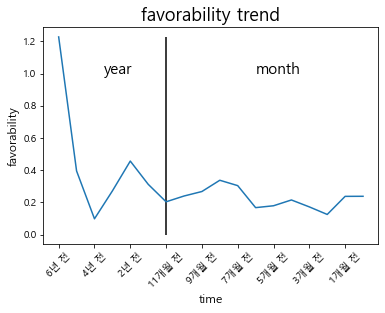

In [85]:
fig,ax = plt.subplots()
ax.plot(df['time'][::-1],df['decision_power'][::-1])
xlabels = df['time'][::-2].values
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_title('favorability trend',fontdict = {"fontsize":18})
ax.set_xlabel('time',fontdict = {"fontsize":12})
ax.set_ylabel('favorability',fontdict = {"fontsize":12})
ax.vlines(18-12,0,np.max(df['decision_power']),color='black')
ax.text(2.5,1,'year',fontdict = {'fontsize': 15})
ax.text(11,1,'month',fontdict = {'fontsize': 15})

plt.savefig('favorability.png',bbox_inches='tight', dpi=300)

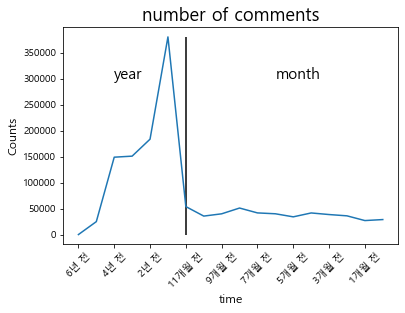

In [86]:
fig,ax = plt.subplots()
ax.plot(df['time'][::-1],df['counts'][::-1])
xlabels = df['time'][::-2].values
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_title('number of comments',fontdict = {"fontsize":18})
ax.set_xlabel('time',fontdict = {"fontsize":12})
ax.set_ylabel('Counts',fontdict = {"fontsize":12})
ax.vlines(18-12,0,np.max(df['counts']),color='black')
ax.text(2,300000,'year',fontdict = {'fontsize': 15})
ax.text(11,300000,'month',fontdict = {'fontsize': 15})
plt.savefig('comment_count.png',bbox_inches='tight', dpi=300)

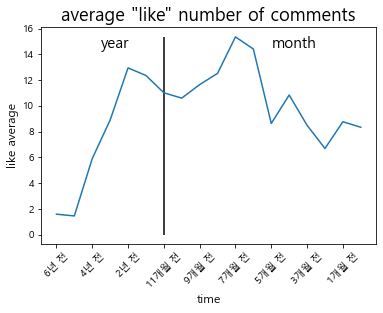

In [87]:
fig,ax = plt.subplots()
ax.plot(df['time'][::-1],df['votes'][::-1])
xlabels = df['time'][::-2].values
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_title('average "like" number of comments',fontdict = {"fontsize":18})
ax.set_xlabel('time',fontdict = {"fontsize":12})
ax.set_ylabel('like average',fontdict = {"fontsize":12})
ax.vlines(18-12,0,np.max(df['votes']),color='black')
ax.text(2.5,14.5,'year',fontdict = {'fontsize': 15})
ax.text(12,14.5,'month',fontdict = {'fontsize': 15})
fig.savefig('like average.png', bbox_inches='tight', dpi=300)

# author

In [4]:
df = pd.read_csv("text_time_vote.csv")
df.head()

,text,author,decision_power,time,votes
0,참고로 일리오스 우물에 들어가면 무서운 소리남,"조회수999,999,999",-1.523378,4년 전(수정됨),0
1,5:22에 등대 불빛도 돌아가네...세심한 갓리자드,햅피니스123,-0.475475,4년 전,4
2,뀽,최윤,-0.754466,4년 전,0
3,옥구슬만 몰라씀\n \n \n \n \n \n 그리고 지브롤터 솜브라로 ㄷ........,발바닥무시무시한,-1.404263,4년 전(수정됨),0
4,이형말투 ㅋㅋㅋ,JINN n,3.572677,3년 전,0


In [5]:
def eliminate_useless(x):
    if x[-5:]=='(수정됨)':
        return x[:-5]
    else:
        return x
def transform_to_0month(string):
    short_time = ['초 전','분 전','시간 전','일 전','주 전']
    for short in short_time:
        if string.find(short) >0 :
            result =  '0개월 전'
            break
        else:
            result = string
    return result
df['time'] = df['time'].map(eliminate_useless)
df['time'] = df['time'].map(transform_to_0month)

In [6]:
grouped2 = df.groupby(['author','time']).count()['text']
grouped1 = df.groupby(['author']).count()['text']

In [7]:
grouped1.name = 'count'

In [8]:
grouped2.name = 'count'

In [9]:
overlab= []
for i in range(200):
    overlab.append(np.round(len(grouped1[grouped1 >= i])/len(grouped1),4))

In [10]:
print(overlab)

[1.0, 1.0, 0.5431, 0.3863, 0.3036, 0.2517, 0.2152, 0.1878, 0.1665, 0.1493, 0.1353, 0.1233, 0.1135, 0.105, 0.0973, 0.0906, 0.0849, 0.0798, 0.0753, 0.071, 0.0674, 0.064, 0.0607, 0.0577, 0.0549, 0.0524, 0.0501, 0.0479, 0.0459, 0.0441, 0.0422, 0.0406, 0.0389, 0.0376, 0.0362, 0.0351, 0.0339, 0.0327, 0.0316, 0.0305, 0.0296, 0.0288, 0.028, 0.0272, 0.0264, 0.0256, 0.0248, 0.0241, 0.0234, 0.0227, 0.0222, 0.0216, 0.021, 0.0204, 0.0199, 0.0194, 0.019, 0.0185, 0.018, 0.0176, 0.0172, 0.0168, 0.0164, 0.016, 0.0156, 0.0153, 0.015, 0.0147, 0.0143, 0.014, 0.0136, 0.0134, 0.0131, 0.0128, 0.0126, 0.0123, 0.0121, 0.0119, 0.0117, 0.0114, 0.0112, 0.0109, 0.0106, 0.0105, 0.0103, 0.0102, 0.01, 0.0098, 0.0096, 0.0094, 0.0092, 0.009, 0.0089, 0.0087, 0.0085, 0.0084, 0.0083, 0.0082, 0.008, 0.0079, 0.0077, 0.0076, 0.0074, 0.0073, 0.0072, 0.0071, 0.007, 0.0068, 0.0067, 0.0067, 0.0066, 0.0064, 0.0063, 0.0062, 0.0061, 0.006, 0.0059, 0.0058, 0.0058, 0.0057, 0.0056, 0.0055, 0.0054, 0.0053, 0.0052, 0.0051, 0.005, 0.005,

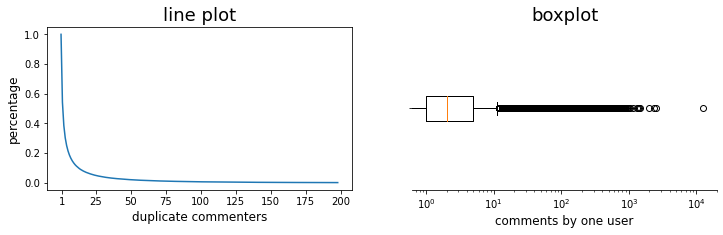

In [11]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
ax[0].plot(overlab[1:])
ax[0].set_xticks([1,25,50,75,100,125,150,175,200])
ax[0].set_xlabel('duplicate commenters',fontdict = {"fontsize":12})
ax[0].set_ylabel('percentage',fontdict = {"fontsize":12})
ax[0].set_title('line plot',fontdict = {"fontsize":18})

ax[1].boxplot(grouped1,vert=False)
ax[1].set_xscale('log')
ax[1].set_title('boxplot',fontdict = {"fontsize":18})
ax[1].set_yticklabels([])
ax[1].set_xlabel('comments by one user',fontdict = {"fontsize":12})
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
plt.savefig('duplicate author.png',bbox_inches='tight', dpi=300)

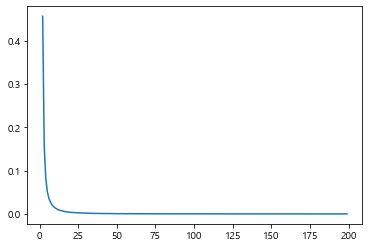

In [32]:
plt.plot(pd.Series(overlab)[1:].shift(1) - pd.Series(overlab)[1:])

In [12]:
pd.DataFrame(grouped2)

count
author      time        
! ROCKCAT   2년 전       1
            7개월 전      1
!!          4년 전       1
!!!!!!발정난뎬네 4년 전       1
!-!         4년 전       1
...                  ...
🤔           1년 전       2
            7개월 전      1
🦉           3년 전       1
            4년 전       1
🧜🏻‍♂️       3년 전       5

[431083 rows x 1 columns]

In [13]:
each_time_df = grouped2.reset_index()

In [14]:
each_time_df

,author,time,count
0,! ROCKCAT,2년 전,1
1,! ROCKCAT,7개월 전,1
2,!!,4년 전,1
3,!!!!!!발정난뎬네,4년 전,1
4,!-!,4년 전,1
...,...,...,...
431078,🤔,1년 전,2
431079,🤔,7개월 전,1
431080,🦉,3년 전,1
431081,🦉,4년 전,1


In [15]:
from matplotlib import font_manager,rc, rcParams
import platform
if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')
rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

Text(0.5, 1.0, 'trend')

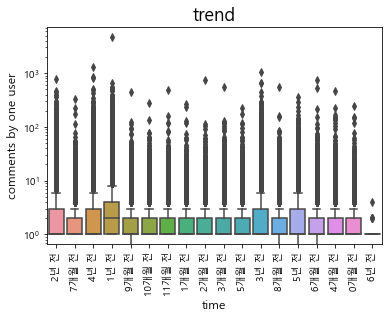

In [16]:
fig,ax = plt.subplots()
sns.boxplot(x = each_time_df['time'], y= each_time_df['count'],ax=ax)
ax.set_yscale('log')
ax.tick_params (axis = 'x', labelrotation =90)
ax.set_xlabel('time',fontdict = {"fontsize":12})
ax.set_ylabel('comments by one user',fontdict = {"fontsize":12})
ax.set_title('trend',fontdict = {"fontsize":18})

In [17]:
each_time_df.sort_values(by='time')

,author,time,count
40273,JS Han,0개월 전,1
31492,H AN,0개월 전,2
408583,피난다,0개월 전,1
175222,김정헌,0개월 전,1
89176,ab cdefg,0개월 전,1
...,...,...,...
24269,Drink pepsi,9개월 전,2
109585,little hope,9개월 전,1
255075,부산갈매기,9개월 전,2
315272,우리오리예나,9개월 전,6


In [18]:
def int_slicing(x):
    string_double_digit = pd.Series(list(range(10,100))).astype('str').values.tolist()
    if x[0:2] in string_double_digit:
        slicing_num = 2
    else:
        slicing_num = 1
    int_part = x[0:slicing_num]
    string_part = x[slicing_num:]
    return int_part

def string_slicing(x):
    string_double_digit = pd.Series(list(range(10,100))).astype('str').values.tolist()
    if x[0:2] in string_double_digit:
        slicing_num = 2
    else:
        slicing_num = 1
    int_part = x[0:slicing_num]
    string_part = x[slicing_num:]
    return string_part
standard = {'초 전':1,'분 전':2,'시간 전':3,'일 전':4,'주 전':5,'개월 전':6,'년 전':7}

In [19]:
each_time_df['standard1'] = each_time_df['time'].map(int_slicing).astype('int')

In [20]:
each_time_df['standard2'] = each_time_df['time'].map(string_slicing).map(standard).astype('int')

In [21]:
ddd = each_time_df.sort_values(by=['standard2','standard1']).reset_index(drop=True)
ddd

,author,time,count,standard1,standard2
0,# 유나,0개월 전,1,0,6
1,##,0개월 전,4,0,6
2,#&#&,0개월 전,1,0,6
3,#0A0A0A,0개월 전,3,0,6
4,#Ch_ CodeName,0개월 전,1,0,6
...,...,...,...,...,...
431078,지지맨,6년 전,1,6,7
431079,채널게임 정보 얻기용,6년 전,1,6,7
431080,최강민,6년 전,1,6,7
431081,하얀색단추,6년 전,4,6,7


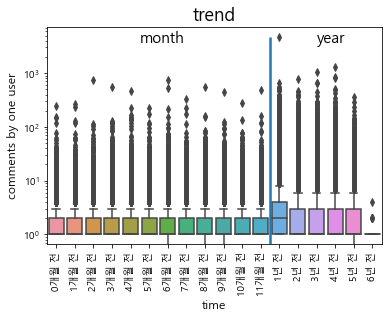

In [22]:
fig,ax = plt.subplots()
sns.boxplot(x = ddd['time'], y= ddd['count'],ax=ax)
ax.set_yscale('log')
ax.tick_params (axis = 'x', labelrotation =90)
ax.set_xlabel('time',fontdict = {"fontsize":12})
ax.set_ylabel('comments by one user',fontdict = {"fontsize":12})
ax.set_title('trend',fontdict = {"fontsize":18})
ax.vlines(11.5,0,np.max(ddd['count']),linewidth=2.5)
ax.text(4.5,np.max(ddd['count'])-1000,'month',fontdict = {"fontsize":15})
ax.text(14,np.max(ddd['count'])-1000,'year',fontdict = {"fontsize":15})
plt.savefig('box_month.png',bbox_inches='tight', dpi=300)

In [23]:
def vvv(x):
    if x[-4:] == '개월 전':
        return '이번 년도'
    else:
        return x
temp = ddd['time'].map(vvv)

In [24]:
'0개월 전'[-4:]

'개월 전'

In [25]:
ddd['time2'] =temp

Text(0.5, 1.0, 'trend')

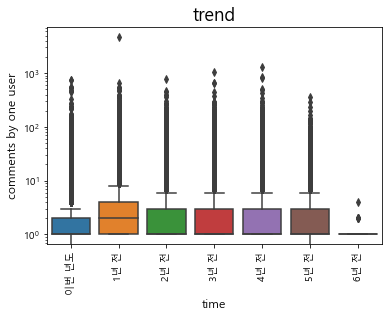

In [34]:
fig,ax = plt.subplots()
sns.boxplot(x = ddd['time2'], y= ddd['count'],ax=ax)
ax.set_yscale('log')
ax.tick_params (axis = 'x', labelrotation =90)
ax.set_xlabel('time',fontdict = {"fontsize":12})
ax.set_ylabel('comments by one user',fontdict = {"fontsize":12})
ax.set_title('trend',fontdict = {"fontsize":18})
# plt.savefig('box_year.png',bbox_inches='tight', dpi=300)


In [121]:
ddd[ddd['time'] == '1년 전']['count'].median()

2.0